In [66]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

In [67]:
data_invest = pd.read_csv(r'E:\python projects\Datasets\Kenvue\trade_investments.csv')
data_invest.head()

,InvestmentID,StoreID,ProductID,InvestmentType,Amount
0,INV_0001,1036,PROD_020,New Product Listing,4131.05
1,INV_0002,1044,PROD_021,Marketing Support,9028.31
2,INV_0003,1167,PROD_033,Shelf Space Optimization,6648.60
3,INV_0004,1155,PROD_008,Shelf Space Optimization,8046.84
4,INV_0005,1168,PROD_009,Display Fee,2405.87


In [68]:
data_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvestmentID    735 non-null    object 
 1   StoreID         735 non-null    int64  
 2   ProductID       735 non-null    object 
 3   InvestmentType  735 non-null    object 
 4   Amount          735 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 28.8+ KB


In [69]:
data_invest.describe( )

,StoreID,Amount
count,735.000000,735.000000
mean,1100.689796,5266.520068
std,57.636123,2725.274461
min,1001.000000,522.760000
25%,1052.500000,2812.320000
50%,1102.000000,5338.980000
75%,1152.500000,7567.060000
max,1200.000000,9997.060000


In [70]:
data_invest.isnull().sum()

InvestmentID      0
StoreID           0
ProductID         0
InvestmentType    0
Amount            0
dtype: int64

In [71]:
data_invest['InvestmentType'].value_counts().sort_values(ascending=False)

InvestmentType
Marketing Support           163
Display Fee                 157
New Product Listing         141
Shelf Space Optimization    137
Co-op Advertising           137
Name: count, dtype: int64

In [72]:
total_amount = data_invest['Amount'].sum()
print('the total invested amount is: ', total_amount , 'SAR')

the total invested amount is:  3870892.25 SAR


In [73]:
# Total amount per InvestmentType
investment_totals = data_invest.groupby('InvestmentType')['Amount'].sum()

# Sort descending
investment_totals_sorted = investment_totals.sort_values(ascending=False)

# Calculate percentage of each type from total
investment_percentages = (investment_totals_sorted / investment_totals_sorted.sum()) * 100

# Combine into a single DataFrame for clarity
summary_df = pd.DataFrame({
    'TotalAmount': investment_totals_sorted,
    'Percentage': investment_percentages.round(2)
})

print(summary_df)


                          TotalAmount  Percentage
InvestmentType                                   
Display Fee                 883023.52       22.81
Marketing Support           808653.57       20.89
New Product Listing         754417.25       19.49
Shelf Space Optimization    723835.35       18.70
Co-op Advertising           700962.56       18.11


In [74]:
data_invest.groupby('InvestmentType')['Amount'].mean().sort_values(ascending=False)

InvestmentType
Display Fee                 5624.353631
New Product Listing         5350.476950
Shelf Space Optimization    5283.469708
Co-op Advertising           5116.515036
Marketing Support           4961.064847
Name: Amount, dtype: float64

In [75]:
investment_totals_sorted  = data_invest.groupby('ProductID')['Amount'].sum().sort_values(ascending=False)

Counts = data_invest['ProductID'].value_counts()

# Calculate percentage of each type from total
investment_percentages = (investment_totals_sorted / investment_totals_sorted.sum()) * 100

# Combine into a single DataFrame for clarity
summary_df = pd.DataFrame({
    'Counts': Counts,
    'TotalAmount': investment_totals_sorted,
    'Percentage': investment_percentages.round(2)
})

print(summary_df.sort_values(by='Percentage', ascending=False))

           Counts  TotalAmount  Percentage
ProductID                                 
PROD_045       26    124199.29        3.21
PROD_029       18    108877.78        2.81
PROD_024       22    108173.69        2.79
PROD_021       16    103488.63        2.67
PROD_025       18     96173.59        2.48
PROD_013       16     95342.69        2.46
PROD_005       17     94716.07        2.45
PROD_012       15     92663.47        2.39
PROD_033       19     92699.22        2.39
PROD_050       13     92437.30        2.39
PROD_019       15     91398.46        2.36
PROD_041       17     91494.24        2.36
PROD_046       18     90992.09        2.35
PROD_035       16     90175.64        2.33
PROD_004       16     88106.97        2.28
PROD_038       17     85879.06        2.22
PROD_023       15     86012.88        2.22
PROD_010       17     85494.54        2.21
PROD_016       15     85328.69        2.20
PROD_020       14     85262.82        2.20
PROD_007       15     85243.41        2.20
PROD_008   

In [76]:
# Total amount per StoreID
investment_totals_sorted = data_invest.groupby('StoreID')['Amount'].sum().sort_values(ascending=False)

# Count of transactions per StoreID
Counts = data_invest['StoreID'].value_counts()

# Percentage of each StoreID from total investment
investment_percentages = (investment_totals_sorted / investment_totals_sorted.sum()) * 100

# Combine into a single DataFrame
summary_df = pd.DataFrame({
    'Counts': Counts,
    'TotalAmount': investment_totals_sorted,
    'Percentage': investment_percentages.round(2)
})

# Sort by percentage descending
summary_df_sorted = summary_df.sort_values(by='Percentage', ascending=False)

print(summary_df_sorted)


         Counts  TotalAmount  Percentage
StoreID                                 
1105         10     53069.71        1.37
1104          6     46534.78        1.20
1098          6     45769.08        1.18
1090          8     44162.87        1.14
1084          6     43898.37        1.13
...         ...          ...         ...
1002          1      2914.93        0.08
1041          1      1865.35        0.05
1016          1      2013.58        0.05
1107          1       910.50        0.02
1163          1       522.76        0.01

[194 rows x 3 columns]


In [77]:
data_store = pd.read_csv(r'E:\python projects\Datasets\Kenvue\stores.csv')
data_store.head()

,StoreID,StoreType,Region,RetailerSize,Retailer
0,1001,Supermarket,Jeddah,Small,Danube
1,1002,Supermarket,Jeddah,Medium,Lulu
2,1003,Supermarket,Jeddah,Small,Danube
3,1004,Pharmacy,Dammam,Small,Watsons
4,1005,Hypermarket,Jeddah,E-commerce,Hyper Panda


In [78]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   StoreID       200 non-null    int64 
 1   StoreType     200 non-null    object
 2   Region        200 non-null    object
 3   RetailerSize  200 non-null    object
 4   Retailer      200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [79]:
data_store.isnull().sum()

StoreID         0
StoreType       0
Region          0
RetailerSize    0
Retailer        0
dtype: int64

In [80]:
data_store['StoreType'].value_counts().sort_values(ascending=False)

StoreType
Pharmacy           63
Supermarket        57
Online Retailer    41
Hypermarket        39
Name: count, dtype: int64

In [81]:
data_store['Retailer'].value_counts().sort_values(ascending=False)

Retailer
Danube         25
Al-Dawaa       25
Amazon         22
Carrefour      22
Noon           19
Watsons        19
Nahdi          19
Lulu           18
Hyper Panda    17
Panda          14
Name: count, dtype: int64

In [82]:
data_store['RetailerSize'].value_counts().sort_values(ascending=False)

RetailerSize
Small         55
Medium        54
E-commerce    50
Large         41
Name: count, dtype: int64

In [83]:
data_store['Region'].value_counts().sort_values(ascending=False)

Region
Jeddah    45
Riyadh    44
Khobar    40
Dammam    36
Mecca     35
Name: count, dtype: int64

In [84]:
data_product = pd.read_csv(r'E:\python projects\Datasets\Kenvue\products.csv')
data_product.head()

,ProductID,Brand,Category,PackSize,COGSPerUnit,LaunchDate
0,PROD_001,Neutrogena,Skincare,500ml,24.89,2/4/2018
1,PROD_002,Neutrogena,Oral Care,50pcs,28.89,10/5/2018
2,PROD_003,Neutrogena,Pain Relief,100g,11.40,2/3/2019
3,PROD_004,Neutrogena,Pain Relief,30ml,33.13,5/4/2019
4,PROD_005,Neutrogena,Oral Care,100pcs,22.65,2/14/2019


In [85]:
data_product['LaunchDate'] = pd.to_datetime(data_product['LaunchDate'], format='%m/%d/%Y')

In [86]:
data_product['LaunchDate'].agg(['min', 'max'])

min   2018-01-19
max   2019-12-16
Name: LaunchDate, dtype: datetime64[ns]

In [87]:
data_product['COGSPerUnit'].describe()

count    50.000000
mean     22.255400
std       8.778345
min       5.830000
25%      13.655000
50%      22.930000
75%      28.885000
max      38.200000
Name: COGSPerUnit, dtype: float64

In [88]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ProductID    50 non-null     object        
 1   Brand        50 non-null     object        
 2   Category     50 non-null     object        
 3   PackSize     50 non-null     object        
 4   COGSPerUnit  50 non-null     float64       
 5   LaunchDate   50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.5+ KB


In [89]:
data_product.isnull().sum()

ProductID      0
Brand          0
Category       0
PackSize       0
COGSPerUnit    0
LaunchDate     0
dtype: int64

In [90]:
data_product['Brand'].value_counts().sort_values(ascending=False)

Brand
Neutrogena       13
Listerine        13
Johnson's        10
Clean & Clear     8
Band-Aid          4
Aveeno            2
Name: count, dtype: int64

In [91]:
data_product['Category'].value_counts().sort_values(ascending=False)

Category
Oral Care      13
Pain Relief    13
Skincare       10
Baby Care       9
First Aid       5
Name: count, dtype: int64

In [92]:
data_sales = pd.read_csv(r'E:\python projects\Datasets\Kenvue\main_sales_data.csv')
data_sales.head()

,YearMonth,Region,Channel,StoreID,Retailer,ProductID,Brand,SKU,UnitsSold,ListPrice,...,Returns,PromoFlag,PromoType,PromoDepth,PromoCost,COGS,CompetitorPrice,MarketSharePct,PaymentTermsDays,IsControlStore
0,2023-02,Dammam,Hypermarket,1083,Carrefour,PROD_001,Neutrogena,PROD_001_500ml,439,76.23,...,418.66,1,PriceDiscount,0.23,6926.02,10926.71,74.77,0.39,90,0
1,2025-02,Jeddah,Supermarket,1039,Panda,PROD_048,Listerine,PROD_048_250ml,490,47.74,...,384.71,1,PriceDiscount,0.12,2663.91,8927.80,38.87,0.34,30,0
2,2023-11,Dammam,Pharmacy,1117,Nahdi,PROD_043,Neutrogena,PROD_043_100pcs,247,41.68,...,34.93,1,BOGO,NaN,1622.92,4401.54,37.11,0.46,90,0
3,2024-07,Khobar,Online Retailer,1114,Amazon,PROD_029,Listerine,PROD_029_200g,232,61.71,...,263.99,0,NaN,NaN,0.00,7906.56,65.57,0.17,30,0
4,2025-06,Dammam,Hypermarket,1051,Hyper Panda,PROD_028,Listerine,PROD_028_500ml,250,59.49,...,152.08,1,Digital,NaN,474.26,6380.00,48.60,0.21,90,0


In [93]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearMonth         50000 non-null  object 
 1   Region            50000 non-null  object 
 2   Channel           50000 non-null  object 
 3   StoreID           50000 non-null  int64  
 4   Retailer          50000 non-null  object 
 5   ProductID         50000 non-null  object 
 6   Brand             50000 non-null  object 
 7   SKU               50000 non-null  object 
 8   UnitsSold         50000 non-null  int64  
 9   ListPrice         50000 non-null  float64
 10  GrossSales        50000 non-null  float64
 11  TradeDiscount     50000 non-null  float64
 12  PromoAllowance    50000 non-null  float64
 13  SlottingFees      50000 non-null  float64
 14  RebateAccrual     50000 non-null  float64
 15  Returns           50000 non-null  float64
 16  PromoFlag         50000 non-null  int64 

In [94]:
data_sales.isnull().sum()

YearMonth               0
Region                  0
Channel                 0
StoreID                 0
Retailer                0
ProductID               0
Brand                   0
SKU                     0
UnitsSold               0
ListPrice               0
GrossSales              0
TradeDiscount           0
PromoAllowance          0
SlottingFees            0
RebateAccrual           0
Returns                 0
PromoFlag               0
PromoType           32523
PromoDepth          42890
PromoCost               0
COGS                    0
CompetitorPrice         0
MarketSharePct          0
PaymentTermsDays        0
IsControlStore          0
dtype: int64

In [95]:
decribe = data_sales.drop(['StoreID','Channel','SKU','Brand','Region','YearMonth','PromoType' ,'Retailer','ProductID', 'PromoFlag', 'IsControlStore'], axis=1).describe(include='all')
decribe

,UnitsSold,ListPrice,GrossSales,TradeDiscount,PromoAllowance,SlottingFees,RebateAccrual,Returns,PromoDepth,PromoCost,COGS,CompetitorPrice,MarketSharePct,PaymentTermsDays
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,7110.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,361.815440,55.556209,20149.688306,2016.407939,807.581748,100.048371,604.266706,200.882592,0.250018,905.534638,8043.739370,55.585983,0.275803,60.146400
std,310.919921,25.685753,21352.827977,2311.110495,2478.305234,57.585364,724.776502,272.400459,0.086291,2549.312988,8057.400865,26.711153,0.130032,24.569791
min,10.000000,8.770000,103.600000,8.020000,0.000000,0.000000,2.250000,0.000000,0.100000,0.000000,58.300000,7.120000,0.050000,30.000000
25%,154.000000,34.990000,6611.890000,611.202500,0.000000,50.300000,168.197500,39.907500,0.180000,0.000000,2790.420000,34.300000,0.160000,30.000000
50%,297.000000,52.660000,13796.785000,1300.145000,0.000000,100.195000,373.480000,110.590000,0.250000,0.000000,5654.880000,52.040000,0.280000,60.000000
75%,438.000000,72.690000,25634.895000,2523.137500,560.077500,149.790000,756.965000,252.902500,0.320000,789.035000,10402.210000,72.822500,0.390000,90.000000
max,1500.000000,133.690000,193305.710000,26846.930000,73714.870000,199.990000,8960.550000,3778.600000,0.400000,73779.970000,57300.000000,156.710000,0.500000,90.000000


In [96]:
data_sales['YearMonth'] = pd.to_datetime(data_sales['YearMonth'], format='%Y-%m')
data_sales['YearMonth'].agg(['min', 'max'])

print(data_sales['YearMonth'].agg(['min', 'max']))

min   2023-01-01
max   2025-06-01
Name: YearMonth, dtype: datetime64[ns]


In [97]:
data_sales['Returns'] = np.ceil(data_sales['Returns'])
data_sales['MarketSharePct'] = data_sales['MarketSharePct'] * 100

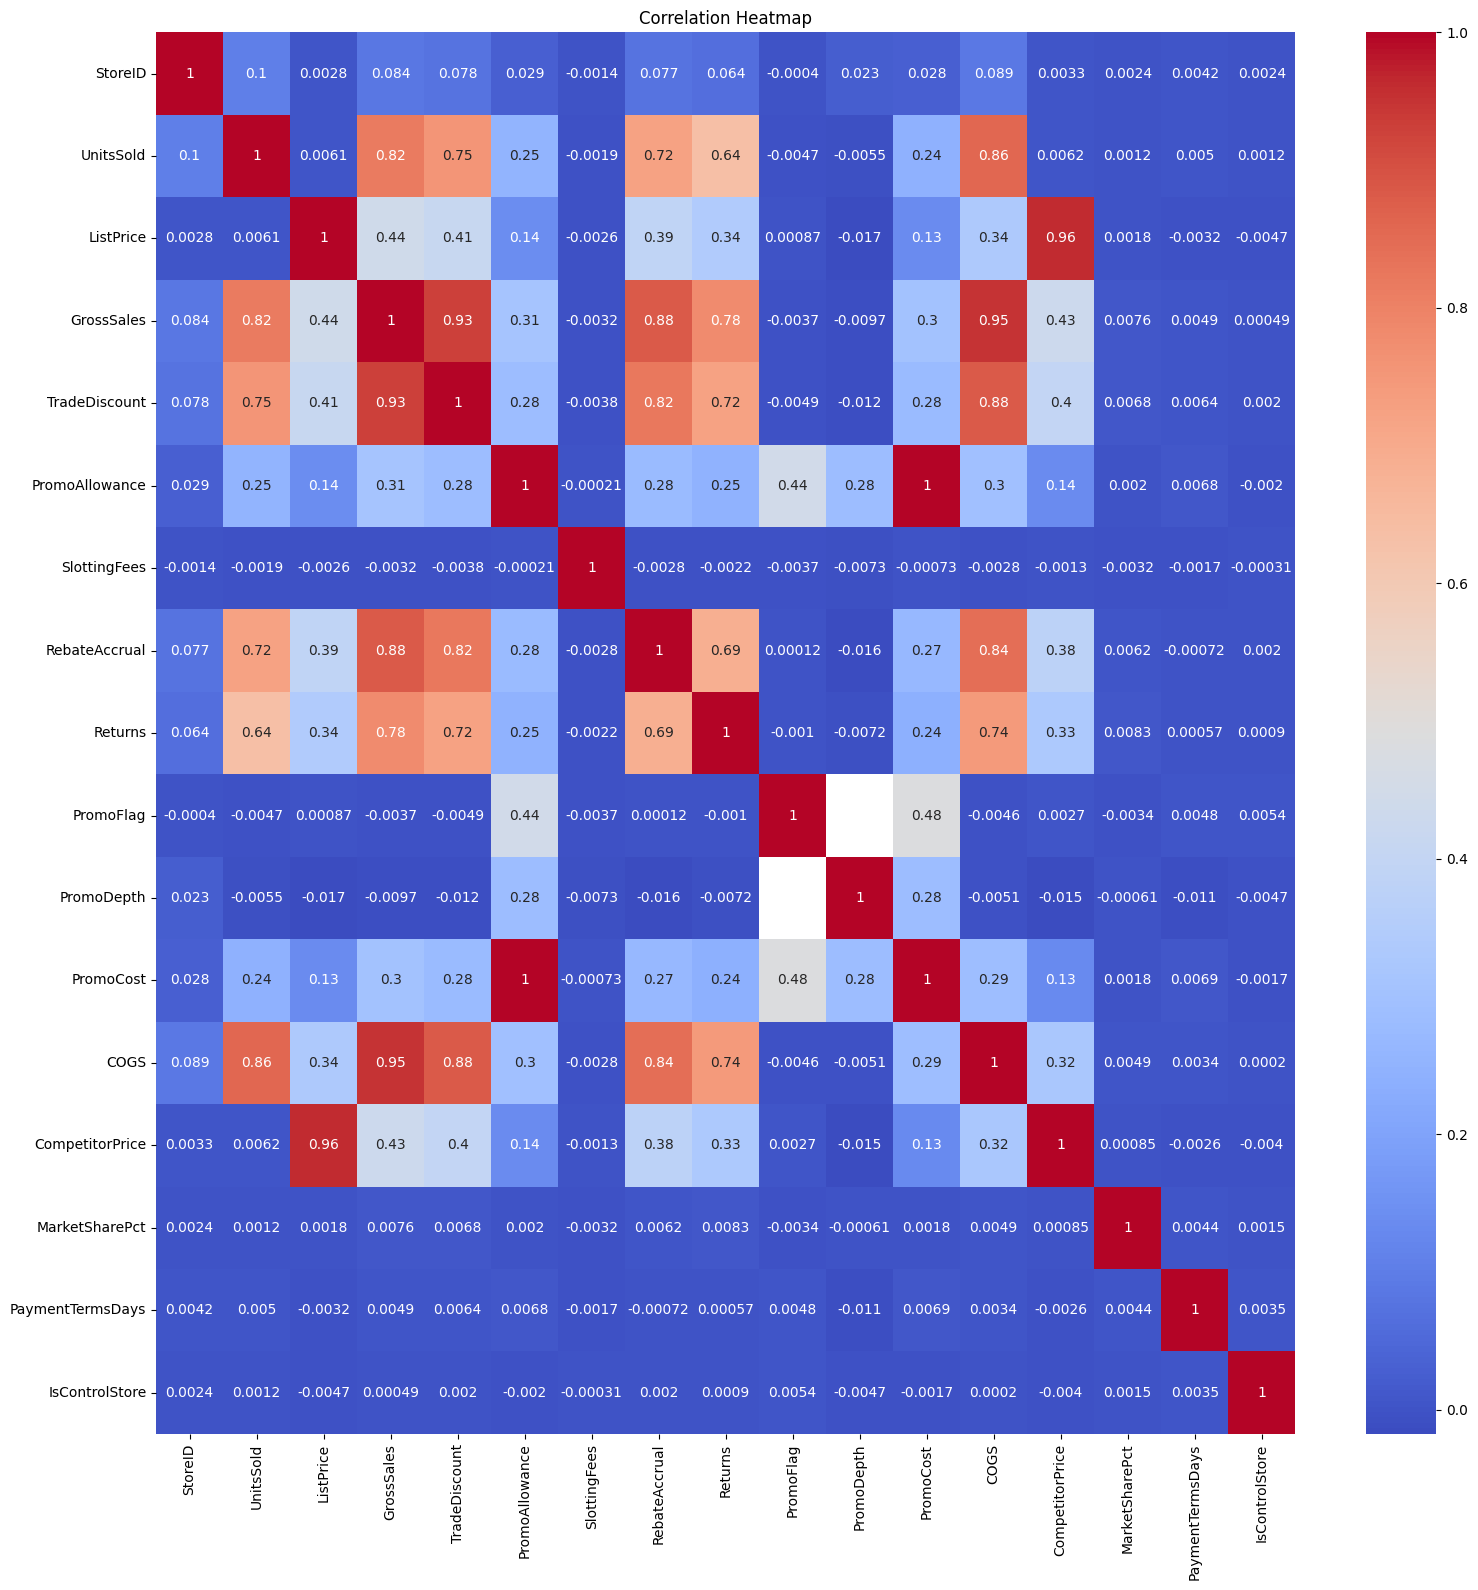

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.heatmap(data_sales.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 📊 Correlation Heatmap — Key Insights

### **1. 🔗 Strong Positive Correlations**
- **UnitsSold ↔ GrossSales (0.82):** Sales volume directly drives revenue.
- **GrossSales ↔ TradeDiscount (0.93)** and **UnitsSold ↔ TradeDiscount (0.75):** Heavy reliance on discounting to boost volume.
- **ListPrice ↔ CompetitorPrice (0.96):** Strong price alignment with competitors.
- **COGS ↔ GrossSales (0.95)** and **COGS ↔ UnitsSold (0.86):** Costs scale tightly with sales.
- **RebateAccrual ↔ GrossSales (0.88)** and ↔ UnitsSold (0.72):** Rebates grow proportionally with sales commitments.

---

### **2. ⚖️ Moderate Positive Correlations**
- **PromoCost ↔ PromoAllowance (0.44):** Higher budgeted promos tend to cost more.
- **PromoFlag ↔ PromoCost (0.48)** and ↔ PromoAllowance (0.44):** Promotions consistently linked to spend.
- **Returns ↔ UnitsSold (0.64)** and ↔ GrossSales (0.78):** Higher sales volumes drive more returns — potential quality or forecasting issue.

---

### **3. 🧊 Weak or Low Correlations**
- **MarketSharePct:** Weakly correlated with price, discounts, or promotions — suggesting other drivers like distribution or brand equity.
- **IsControlStore:** Near-zero correlation with commercial levers — control stores behave independently.

---

### **4. 🚨 Strategic Red Flags**
- **Sales dependency on Trade Discounts and Rebates** poses margin risk — volume may collapse if incentives are reduced.
- **Returns scaling with volume** could erode net revenue — investigate root causes.
- **Low MarketShare correlation with spend** implies current investments aren’t shifting competitive position effectively.


In [99]:

# 1. Calculate Total Deductions (revenue-related)
data_sales['Total_deductions'] = (
    data_sales['TradeDiscount'] +
    data_sales['PromoAllowance'] +
    data_sales['SlottingFees'] +
    data_sales['RebateAccrual'] +
    data_sales['Returns']
)

# 2. Calculate Net Sales
data_sales['NetSales'] = data_sales['GrossSales'] - data_sales['Total_deductions']

# 3. Calculate Profit (assumes COGS is total, not per unit; adjust if needed)
data_sales['Profit'] = data_sales['NetSales'] - data_sales['COGS']

# 4. Calculate Profit Margin %
data_sales['ProfitMargin'] = round( ((data_sales['Profit'] / data_sales['NetSales']) * 100) , 2)

# 5. Calculate GTN %
data_sales['GTN_Percentage'] = round( ((data_sales['NetSales'] / data_sales['GrossSales']) * 100 ) , 2)

# 6. Share of Promo Allowance in Total Deductions
data_sales['DeductionShare_Promo'] = round(((data_sales['PromoAllowance'] / data_sales['Total_deductions']) * 100), 2)


In [100]:
total_net_sales = data_sales['NetSales'].sum()

print("Total Net Sales:", f"{round(total_net_sales, 2):,}", "SAR")


Total Net Sales: 821,000,268.07 SAR


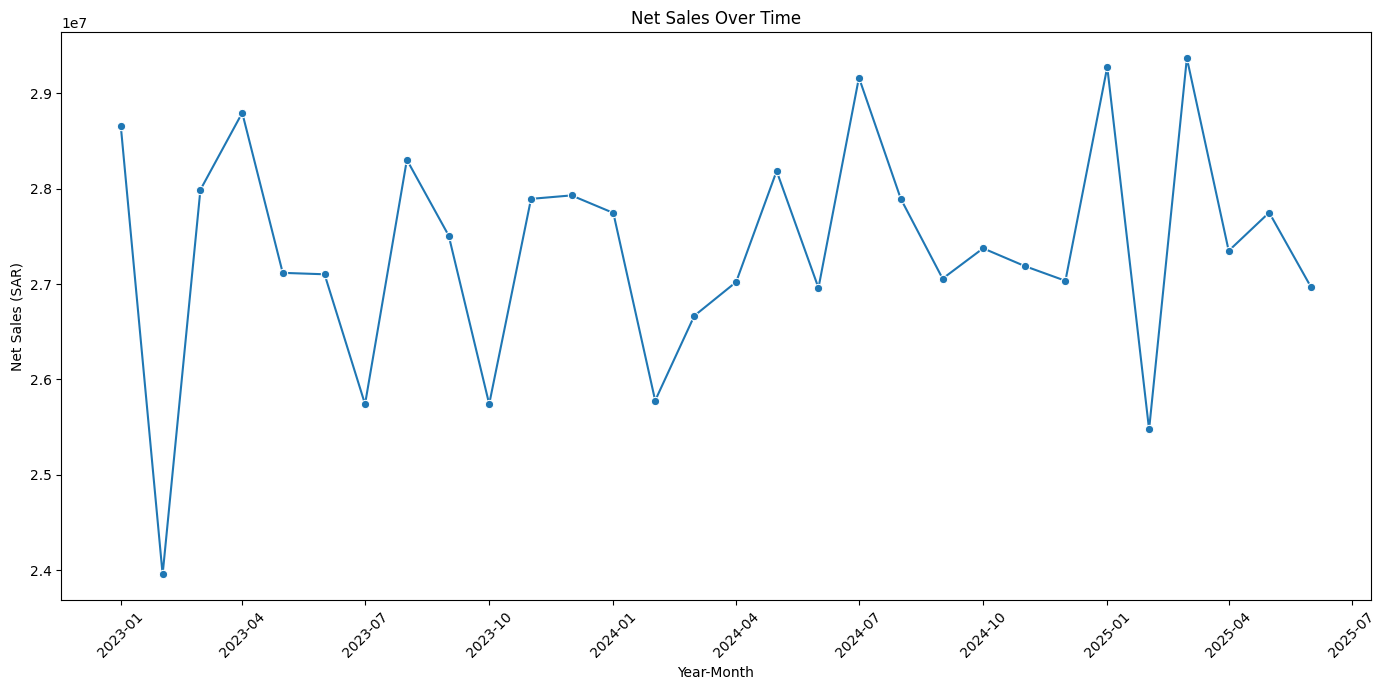

In [101]:
# Line chart: Net Sales over time
monthly_sales = data_sales.groupby('YearMonth')['NetSales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='NetSales', marker='o')
plt.title('Net Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Net Sales (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Net Sales Analysis Over Time 
- Big Decrease in sales in February (2023 , 2024 & 2025)
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024) 
- Decrease in sales in July 2023 & October (2023 , 2024 )

In [102]:
Net_Sales_per_Region = data_sales.groupby('Region')['NetSales'].sum().sort_values(ascending=False)

print("Total Net Sales per Region (SAR):")
print(Net_Sales_per_Region.round(2).apply(lambda x: f"{x:,.2f}"))


Total Net Sales per Region (SAR):
Region
Jeddah    197,728,339.80
Riyadh    171,686,625.62
Khobar    170,843,263.20
Mecca     143,112,668.18
Dammam    137,629,371.27
Name: NetSales, dtype: object


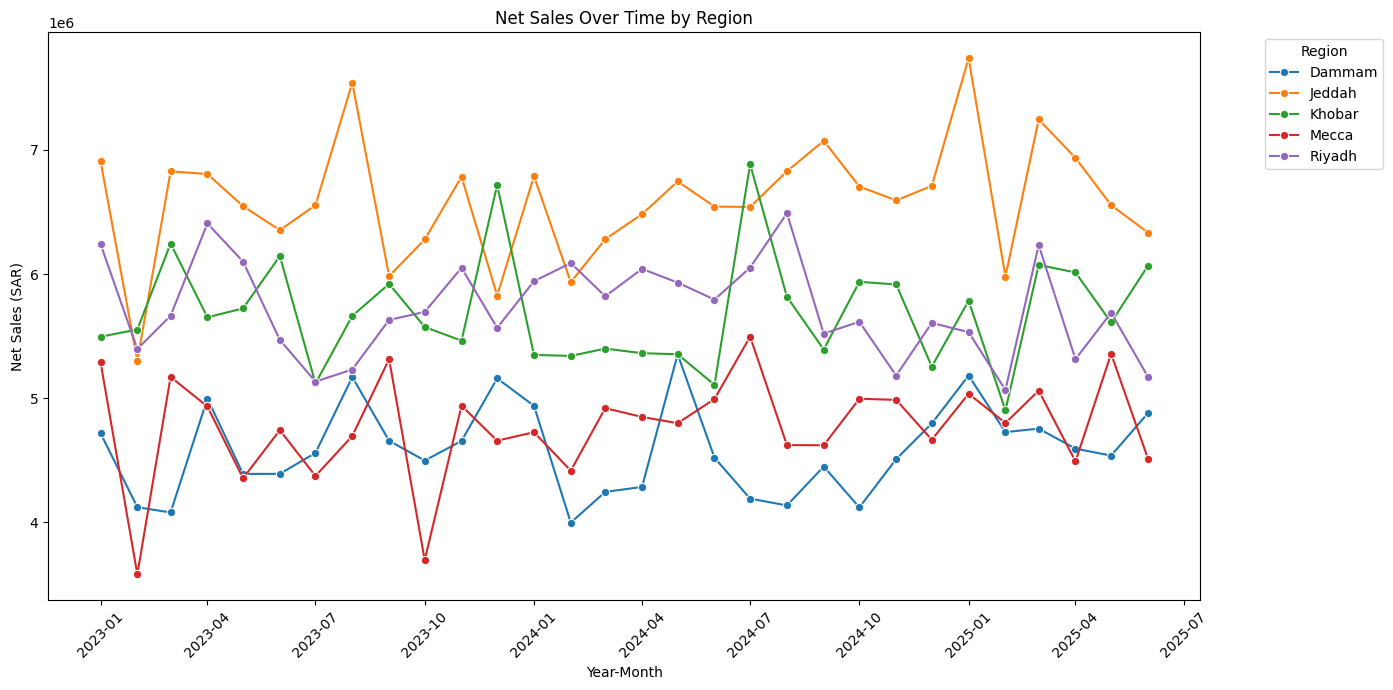

In [103]:
# Line chart: NetSales per Region over time
region_monthly_sales = data_sales.groupby(['Region', 'YearMonth'])['NetSales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_monthly_sales, x='YearMonth', y='NetSales', hue='Region', marker='o')
plt.title('Net Sales Over Time by Region')
plt.xlabel('Year-Month')
plt.ylabel('Net Sales (SAR)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Net Sales per Region over time
- Big Decrease in sales in February (2023 "All regions Except Khobar" , 2024 ""All regions Except Khobar & Riyadh" & 2025 "All regions ")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)  "Jan 2023 All regions" - "March 2023 All regions Except Dammam" - "Augest 2023 All regions Specially in Jeddah" - "Jan 2024 Jeddah" - "March 2024 All regions increased Slightly Except Riyadh" - "Augest 2024 Riyadh & Jeddah" - "Jan 2025 All regions increased Specially Jeddah , Except Riyadh" - "March 2025 All regions increased  Riyadh , Jeddah & Khobar"
- Decrease in sales in September & October (2023 , 2024 )  - "September 2023 Jeddah & Dammam" - "October 2023 Mainly Mecca" - "September 2024 Riyadh, Khobar & Jeddah" - "October 2024 Jeddah & Dammam Slightly Decreased "
- Decrease in sales in July 2023   - "July 2023 Mainly Khobar" 

In [104]:
Net_Sales_per_Retailer = data_sales.groupby('Retailer')['NetSales'].sum().sort_values(ascending=False)

print("Total Net Sales per Retailer (SAR):")
print(Net_Sales_per_Retailer.round(2).apply(lambda x: f"{x:,.2f}"))


Total Net Sales per Retailer (SAR):
Retailer
Amazon         199,533,159.49
Noon           168,915,277.61
Al-Dawaa        71,469,942.75
Danube          70,453,174.71
Carrefour       65,332,640.13
Watsons         54,029,365.02
Nahdi           53,788,402.98
Lulu            50,423,586.39
Hyper Panda     48,408,843.75
Panda           38,645,875.24
Name: NetSales, dtype: object


- Amazon & Noon are the main retailers With the highest sales Percentage from the total Net Sales ~ 45% Together

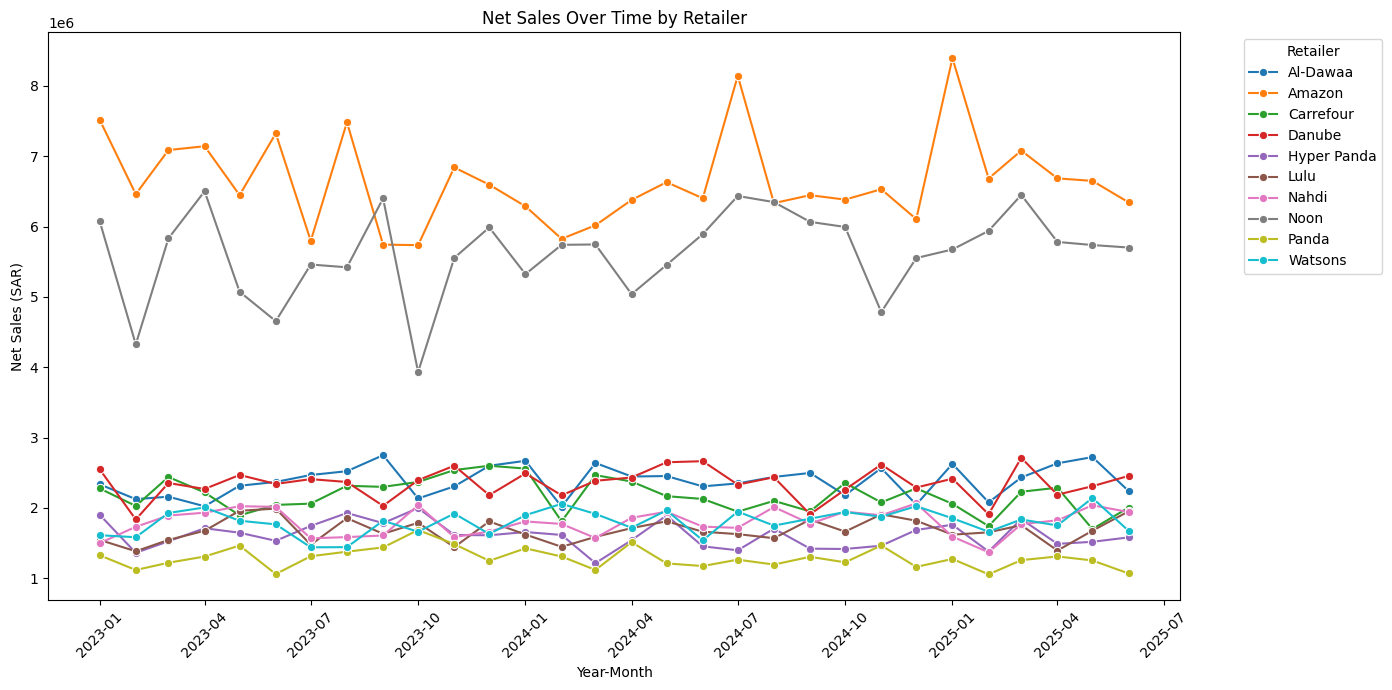

In [105]:
retailer_monthly_sales = data_sales.groupby(['Retailer', 'YearMonth'])['NetSales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=retailer_monthly_sales, x='YearMonth', y='NetSales', hue='Retailer', marker='o')
plt.title('Net Sales Over Time by Retailer')
plt.xlabel('Year-Month')
plt.ylabel('Net Sales (SAR)')
plt.xticks(rotation=45)
plt.legend(title='Retailer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Net Sales Analysis by Retailer
- Big Decrease in sales in February (2023 "Mainly Noon" , 2024 ""All Retailers Except Watsons & Noon" & 2025 "All Retailers "Mainly Amazon" Except Noon")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)  "Jan 2023 All Retailers" - "March 2023 All Retialers" - "Augest 2023 Mainly Amazon"  - "March 2024 & Augest 2024 No Main Retailer"  - "Jan 2025 AMainly Amazon" - "March 2025 All Retailers"
- Decrease in sales in July 2023 & October (2023 , 2024 )  - "July 2023 Mainly Amazon" - "October 2023 Mainly Noon" - "September 2024 Danube" 

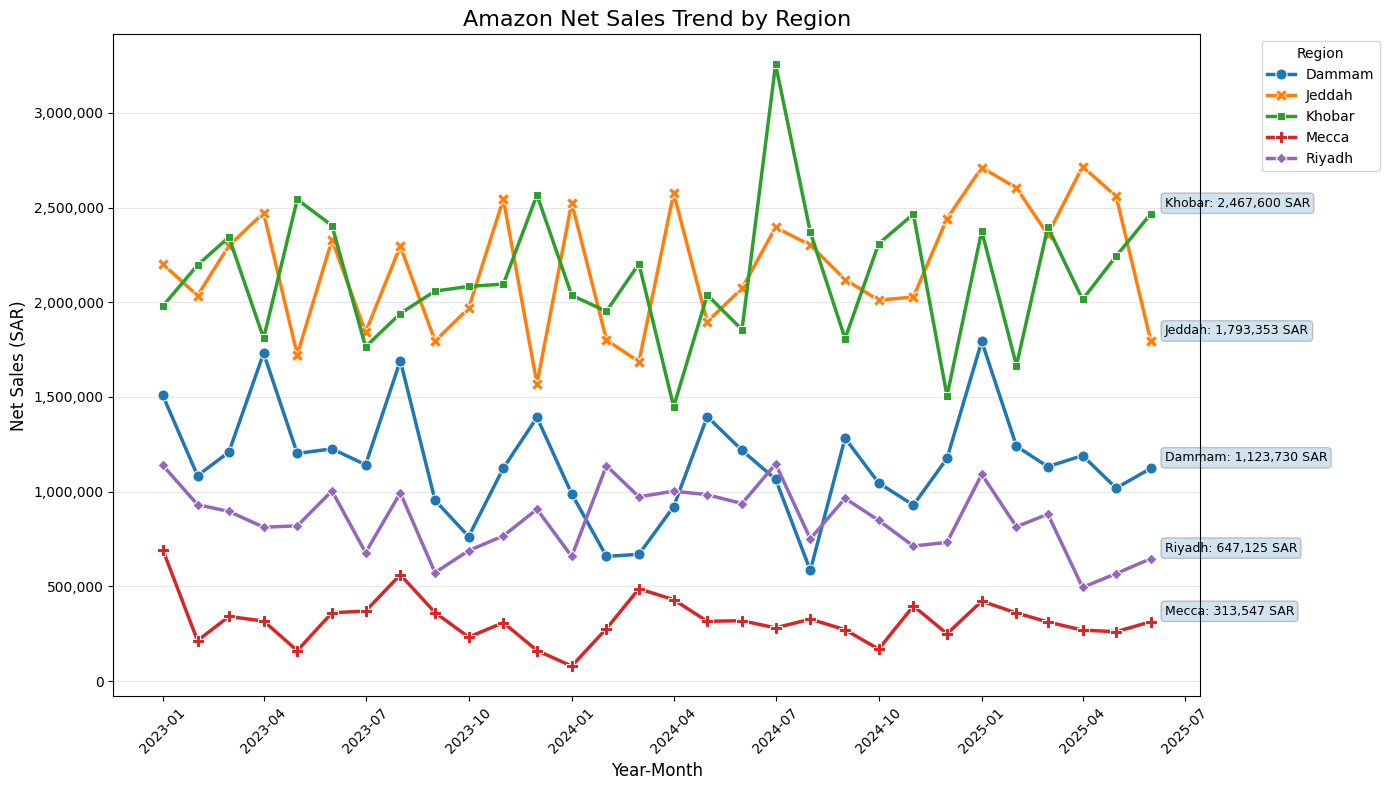

In [106]:
# 1. Filter data for Amazon only
amazon_sales = data_sales[data_sales['Retailer'] == 'Amazon']

# 2. Aggregate net sales by region and month
amazon_region_sales = amazon_sales.groupby(
    ['Region', 'YearMonth']
)['NetSales'].sum().reset_index()

# 3. Convert to datetime and sort
amazon_region_sales['YearMonth'] = pd.to_datetime(amazon_region_sales['YearMonth'])
amazon_region_sales = amazon_region_sales.sort_values(['Region', 'YearMonth'])

# 4. Create visualization
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    data=amazon_region_sales,
    x='YearMonth',
    y='NetSales',
    hue='Region',
    style='Region',
    markers=True,
    dashes=False,
    markersize=8,
    linewidth=2.5,
    palette='tab10'  # Distinct colors for regions
)

# 5. Formatting
plt.title('Amazon Net Sales Trend by Region', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Net Sales (SAR)', fontsize=12)
plt.xticks(rotation=45)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))

# 6. Add data labels for last point in each region
regions = amazon_region_sales['Region'].unique()
for region in regions:
    region_data = amazon_region_sales[amazon_region_sales['Region'] == region]
    if not region_data.empty:
        last_point = region_data.iloc[-1]
        plt.annotate(f"{region}: {last_point['NetSales']:,.0f} SAR", 
                    (last_point['YearMonth'], last_point['NetSales']),
                    textcoords="offset points",
                    xytext=(10, 5),
                    ha='left',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))

# 7. Add grid and legend
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Amazon Net Sales by Region
- Big Decrease in sales in February ( 2024 ""Amazon in Dammam & jeddah" & 2025 "Amazon in Dammam & Khobar")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)   "March 2023 Manily Amazon Jeddah" - "Augest 2023 All Amazon Mainly Dammam , Jeddah & Riyadh"   - "Jan 2025 Mainly Amazon Dammam , jeddah & Khobar" - "March 2025 Amazon Khobar"
- Decrease in sales in July 2023 & October (2023 , 2024 )  - "July 2023 Mainly Amazon Khobar" -"September 2023 Mainly Amazon Dammam"  - "September 2024 Khober" 

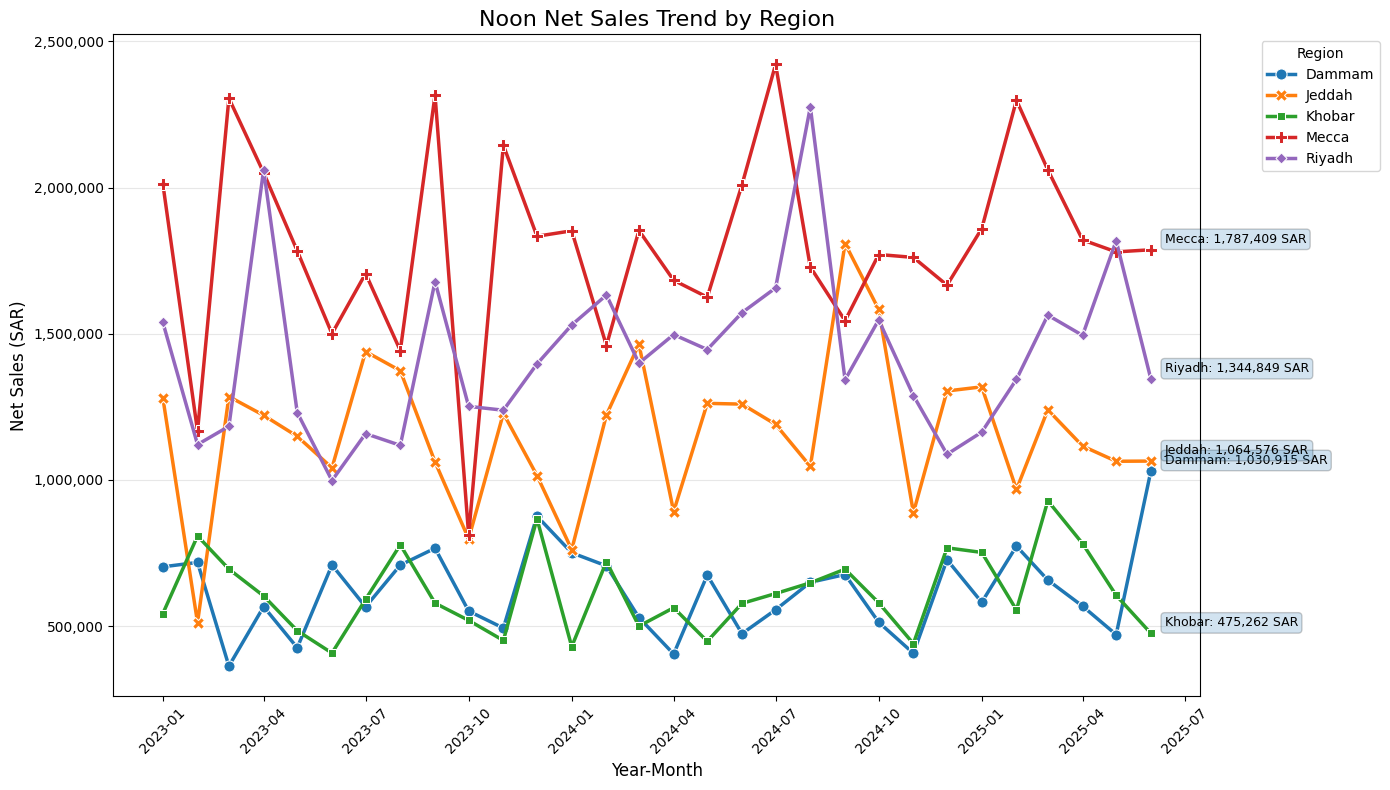

In [107]:
# 1. Filter data for Noon only
Noon_sales = data_sales[data_sales['Retailer'] == 'Noon']

# 2. Aggregate net sales by region and month
Noon_region_sales = Noon_sales.groupby(
    ['Region', 'YearMonth']
)['NetSales'].sum().reset_index()

# 3. Convert to datetime and sort
Noon_region_sales['YearMonth'] = pd.to_datetime(Noon_region_sales['YearMonth'])
Noon_region_sales = Noon_region_sales.sort_values(['Region', 'YearMonth'])

# 4. Create visualization
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    data=Noon_region_sales,
    x='YearMonth',
    y='NetSales',
    hue='Region',
    style='Region',
    markers=True,
    dashes=False,
    markersize=8,
    linewidth=2.5,
    palette='tab10'  # Distinct colors for regions
)

# 5. Formatting
plt.title('Noon Net Sales Trend by Region', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Net Sales (SAR)', fontsize=12)
plt.xticks(rotation=45)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))

# 6. Add data labels for last point in each region
regions = Noon_region_sales['Region'].unique()
for region in regions:
    region_data = Noon_region_sales[Noon_region_sales['Region'] == region]
    if not region_data.empty:
        last_point = region_data.iloc[-1]
        plt.annotate(f"{region}: {last_point['NetSales']:,.0f} SAR", 
                    (last_point['YearMonth'], last_point['NetSales']),
                    textcoords="offset points",
                    xytext=(10, 5),
                    ha='left',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))

# 7. Add grid and legend
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Noon Retailer Net Sales Analysis by Region
- Big Decrease in sales in February (2023 "Noon in Riyadh,Jeddah & Mecca" , 2024 "Noon Mecca" & 2025 "All  Noon Jeddah & Khobar")
- increase in sales in January & March (2023 , 2024 & 2025)  & Augest (2023 , 2024)  "Jan 2023 Noon Jeddah, Mecca & Riyadh" - "March 2023 Noon Dammam" - "Augest 2023 Mainly Noon Mecca "  - "Augest 2024 Noon Mecca"  - "March 2025 Noon Khobar, Jeddah & Riyadh"
- Decrease in sales in September & October (2023 , 2024 )  - "September 2023 Noon Jeddah" - "October 2023 All Noon But Mainly Mecca" - "September 2024 Mainly Noon riyadh" 

In [108]:
# SKU Performance Summary Analysis
# ================================

# 1. Aggregate Key Metrics by SKU
# -------------------------------
sku_summary = (
    data_sales
    .groupby('SKU')
    .agg(
        Total_NetSales=('NetSales', 'sum'),
        Total_Profit=('Profit', 'sum'),
        Avg_MarketShare=('MarketSharePct', 'mean')
    )
    .sort_values('Total_NetSales', ascending=False)
)

# 2. Calculate Sales Share Percentage
# -----------------------------------
total_sales = sku_summary['Total_NetSales'].sum()
sku_summary['Sales_Share_Pct'] = (sku_summary['Total_NetSales'] / total_sales) * 100

# 3. Format Results for Display
# -----------------------------
formatted_summary = (
    sku_summary
    .reset_index()
    .assign(
        Formatted_NetSales = lambda x: x['Total_NetSales'].apply(lambda v: f"SAR {v:,.2f}"),
        Formatted_Profit = lambda x: x['Total_Profit'].apply(lambda v: f"SAR {v:,.2f}"),
        Formatted_Share = lambda x: x['Sales_Share_Pct'].apply(lambda v: f"{v:.2f}%"),
        Formatted_MarketShare = lambda x: x['Avg_MarketShare'].apply(lambda v: f"{v:.2f}%")
    )
    [['SKU', 'Formatted_NetSales', 'Formatted_Profit', 
      'Formatted_Share', 'Formatted_MarketShare']]
    .rename(columns={
        'Formatted_NetSales': 'Net Sales',
        'Formatted_Profit': 'Profit',
        'Formatted_Share': 'Sales Share',
        'Formatted_MarketShare': 'Avg Market Share'
    })
)

# 4. Display Results
# ------------------
print("SKU Performance Summary:")
print("=" * 80)
print(formatted_summary.to_string(index=False))



SKU Performance Summary:
            SKU         Net Sales            Profit Sales Share Avg Market Share
  PROD_024_100g SAR 28,314,662.13 SAR 14,727,641.73       3.45%           27.39%
  PROD_025_30ml SAR 28,071,015.17 SAR 14,465,743.49       3.42%           28.05%
 PROD_014_500ml SAR 27,508,587.23 SAR 14,025,130.33       3.35%           28.12%
  PROD_018_200g SAR 26,223,951.91 SAR 13,357,160.51       3.19%           26.86%
  PROD_045_200g SAR 24,798,278.97 SAR 12,705,800.85       3.02%           27.22%
  PROD_004_30ml SAR 24,268,537.58 SAR 12,456,698.68       2.96%           27.86%
  PROD_029_200g SAR 24,012,092.47 SAR 12,231,249.91       2.92%           27.27%
 PROD_017_150ml SAR 23,629,376.69 SAR 12,210,340.69       2.88%           27.62%
 PROD_012_250ml SAR 23,293,916.66 SAR 12,081,604.90       2.84%           26.83%
 PROD_036_50pcs SAR 22,807,291.11 SAR 11,766,993.99       2.78%           28.17%
 PROD_016_500ml SAR 22,786,491.73 SAR 11,638,351.30       2.78%           27.49%
 PR

In [139]:
# Baseline = average MarketSharePct in stable (non-decline) periods
baseline_share = data_sales[data_sales['NetSales'] > data_sales['NetSales'].mean()]['MarketSharePct'].mean()

# Calculate share loss during decline periods
decline_periods = data_sales[data_sales['NetSales'] < data_sales['NetSales'].mean()]
decline_periods['Share_Loss'] = baseline_share - decline_periods['MarketSharePct']

# Group by SKU/Region/Retailer to find biggest competitive threats
share_loss_analysis = decline_periods.groupby(['SKU', 'Region', 'Retailer'])['Share_Loss'].mean().sort_values(ascending=False)
print(share_loss_analysis)


SKU              Region  Retailer 
PROD_001_500ml   Mecca   Amazon       22.648364
                 Dammam  Noon         22.648364
PROD_018_200g    Dammam  Noon         21.648364
PROD_006_50pcs   Mecca   Panda        21.648364
PROD_010_200g    Dammam  Amazon       20.648364
                                        ...    
PROD_008_30ml    Khobar  Watsons     -20.351636
PROD_028_500ml   Khobar  Noon        -21.351636
PROD_046_500ml   Jeddah  Carrefour   -21.351636
PROD_011_100pcs  Riyadh  Amazon      -22.351636
PROD_021_500ml   Khobar  Noon        -22.351636
Name: Share_Loss, Length: 2469, dtype: float64


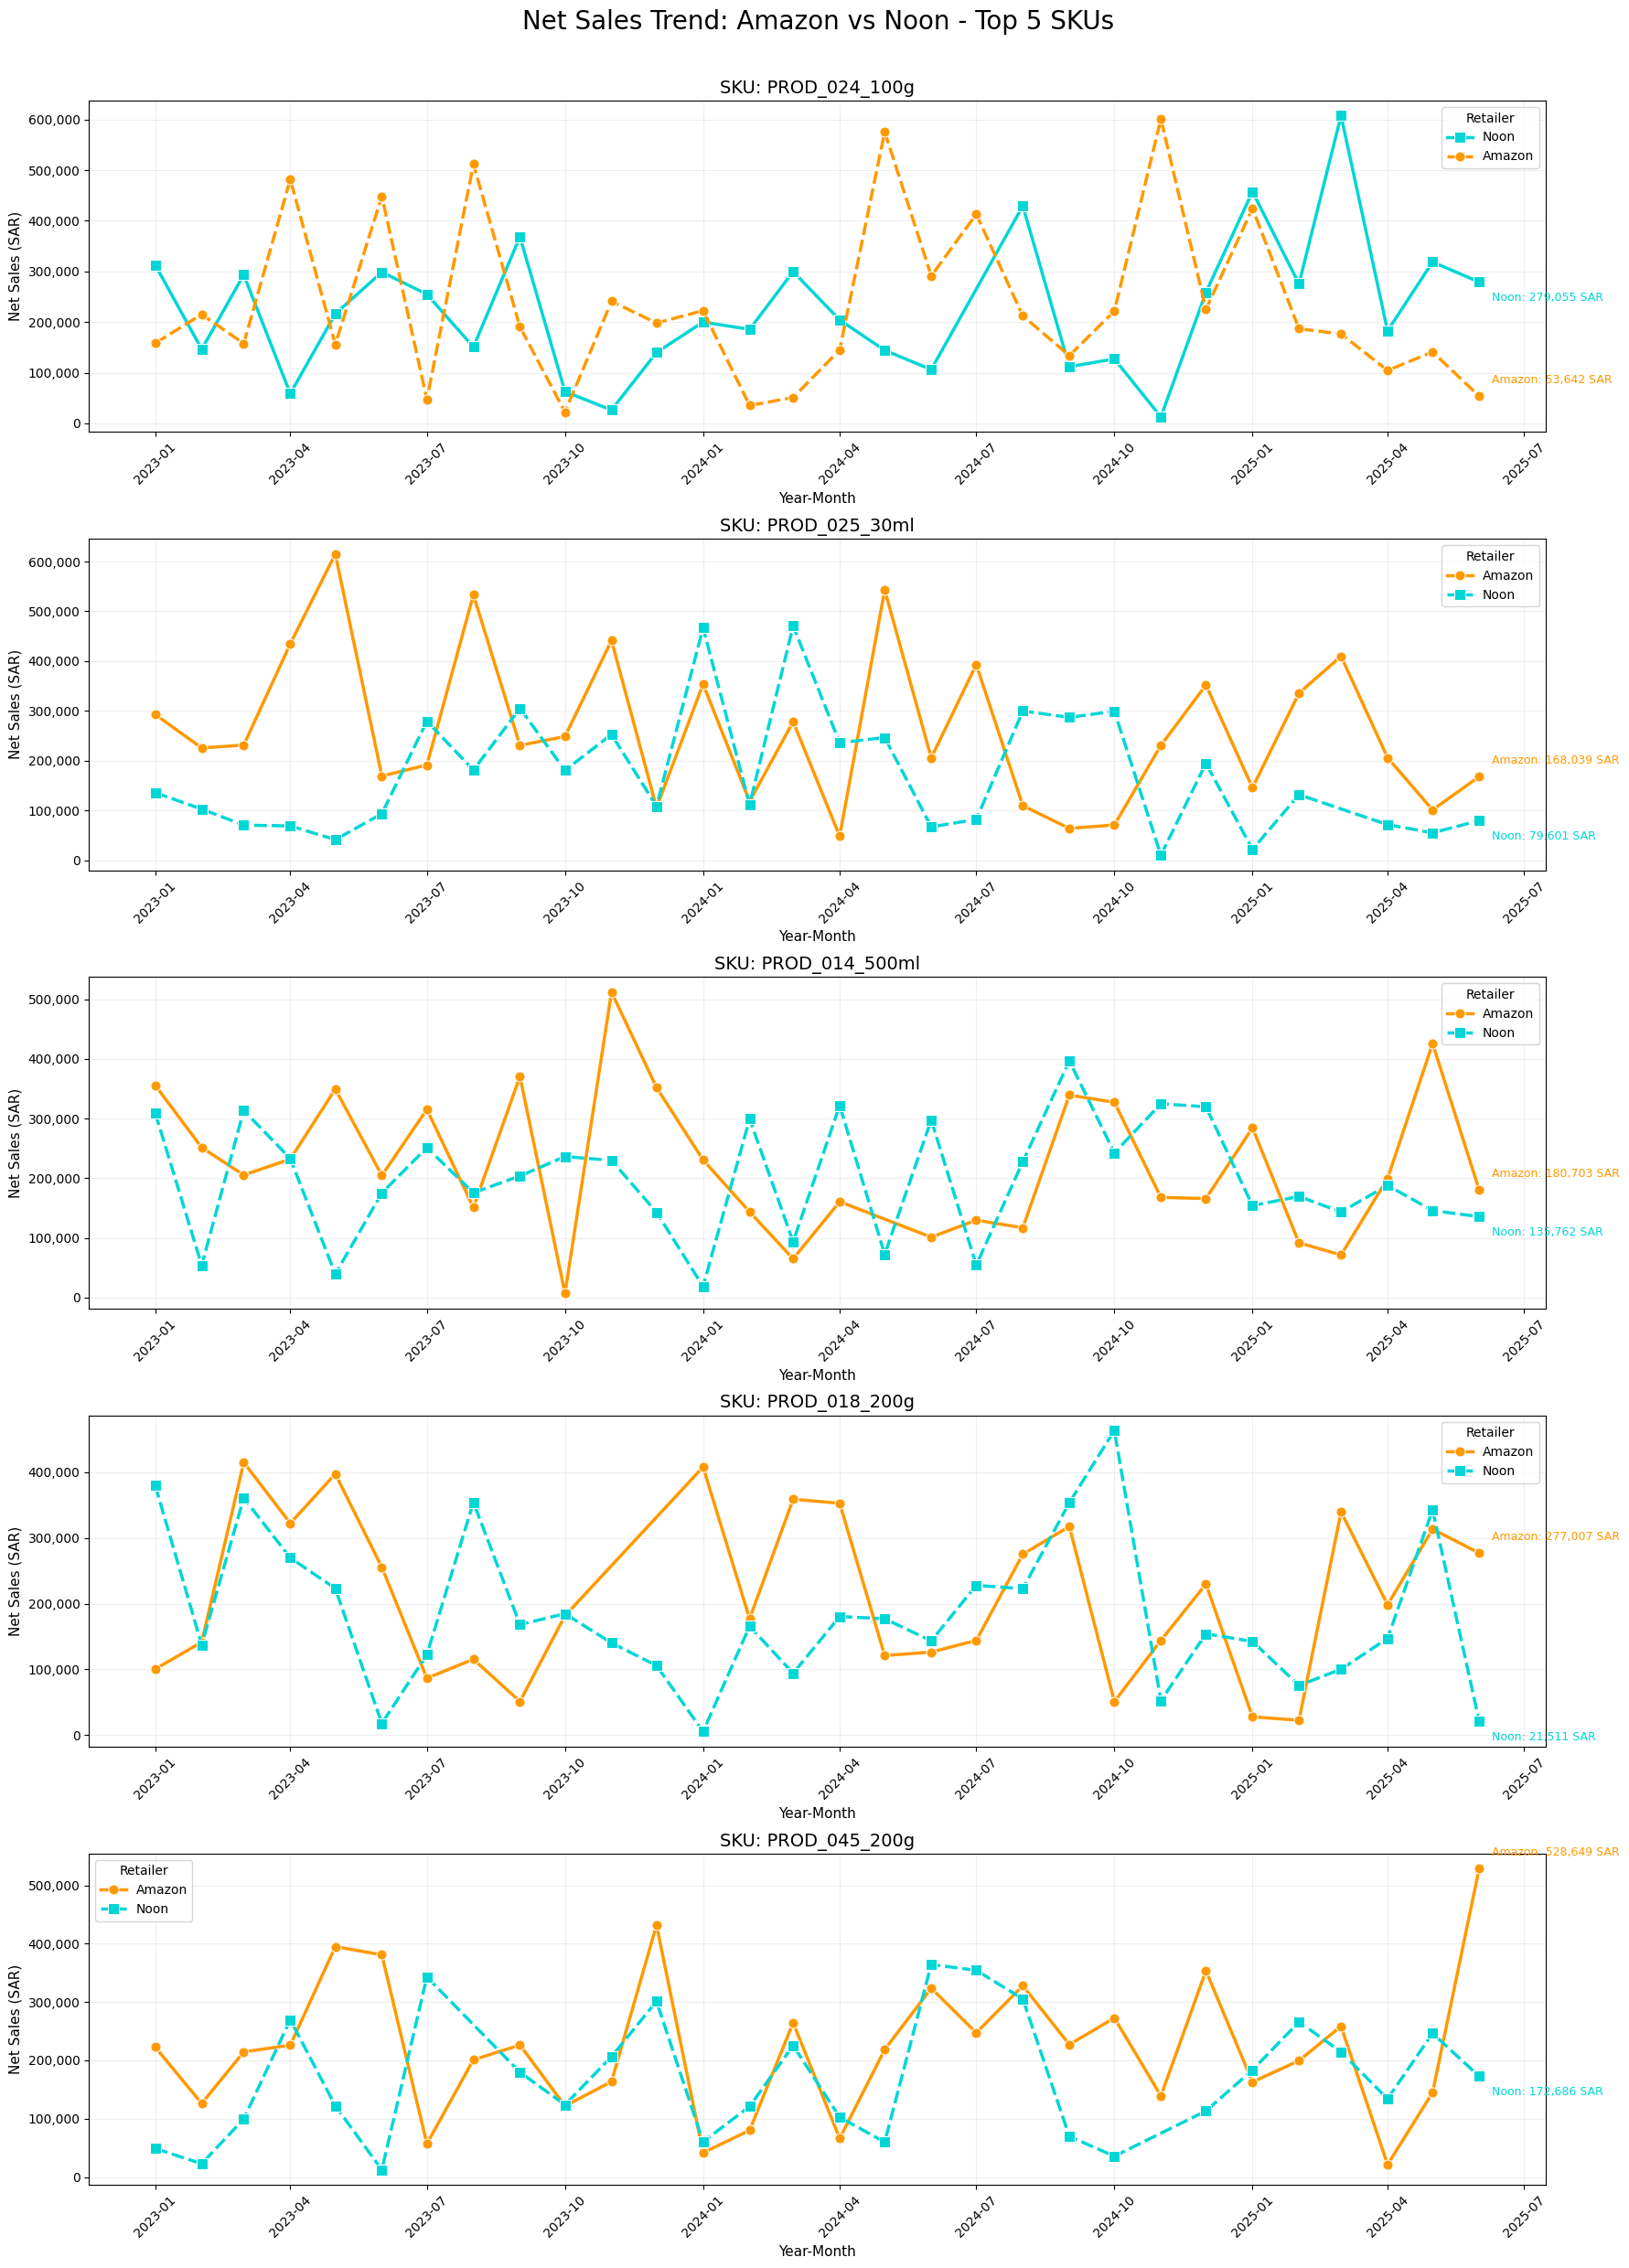

In [109]:

# 1. Identify top 10 SKUs across both retailers
# =============================================
# Get top SKUs by total sales (Amazon + Noon combined)
amazon_noon_sales = data_sales[data_sales['Retailer'].isin(['Amazon', 'Noon'])]
top_skus = amazon_noon_sales.groupby('SKU')['NetSales'].sum().nlargest(5).index

# 2. Filter data for Amazon/Noon and top SKUs
# ==========================================
filtered_data = amazon_noon_sales[amazon_noon_sales['SKU'].isin(top_skus)]

# 3. Prepare monthly sales data
# =============================
retailer_sku_sales = filtered_data.groupby(
    ['Retailer', 'SKU', 'YearMonth']
)['NetSales'].sum().reset_index()

# Convert to datetime and sort
retailer_sku_sales['YearMonth'] = pd.to_datetime(retailer_sku_sales['YearMonth'])
retailer_sku_sales = retailer_sku_sales.sort_values('YearMonth')

# 4. Create visualization grid
# ============================
# Create a 5x2 grid of subplots (for 10 SKUs)
fig, axes = plt.subplots(5, 1, figsize=(18, 25))
fig.suptitle('Net Sales Trend: Amazon vs Noon - Top 5 SKUs', fontsize=20, y=0.99)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, sku in enumerate(top_skus):
    ax = axes[i]
    sku_data = retailer_sku_sales[retailer_sku_sales['SKU'] == sku]
    
    # Plot Amazon and Noon data
    sns.lineplot(
        data=sku_data,
        x='YearMonth',
        y='NetSales',
        hue='Retailer',
        style='Retailer',
        markers={'Amazon': 'o', 'Noon': 's'},
        markersize=8,
        linewidth=2.5,
        ax=ax,
        palette={'Amazon': '#FF9900', 'Noon': '#00D6D6'}
    )
    
    # Formatting per subplot
    ax.set_title(f'SKU: {sku}', fontsize=14)
    ax.set_xlabel('Year-Month', fontsize=11)
    ax.set_ylabel('Net Sales (SAR)', fontsize=11)
    ax.xaxis.set_tick_params(rotation=45)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
    ax.grid(alpha=0.2)
    
    # Add data labels for last point
    for retailer in ['Amazon', 'Noon']:
        retailer_data = sku_data[sku_data['Retailer'] == retailer]
        if not retailer_data.empty:
            last_point = retailer_data.iloc[-1]
            ax.annotate(f"{retailer}: {last_point['NetSales']:,.0f} SAR", 
                        (last_point['YearMonth'], last_point['NetSales']),
                        textcoords="offset points",
                        xytext=(10, 10 if retailer == 'Amazon' else -15),
                        ha='left',
                        fontsize=9,
                        color='#FF9900' if retailer == 'Amazon' else '#00D6D6')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Space for main title
plt.show()



# Net Sales Trend: Amazon vs Noon - Top 5 SKUs
- Prod_024_100g : Decline in sales in 07 - 2023 & 10 - 2023 , 02 - 2024 & 02 - 2025 "Noon Also" in Amazon , 02 - 2023 in Noon
- Prod_025_30ml: Decline in sales in 02 - 2024  in Amazon & Noon
- prod_014_500ml: Decline in sales in 10 - 2023 & 02 - 2025 in Amazon 
- prod_018_200g: Decline in sales in 07 - 2023 & 02 - 2024 & 02 - 2025 in Amazon 
- prod_045_200g: Decline in sales in 07 - 2023 in Amazon & 10 - 2023 "Noon & Amazon" 

In [110]:
Discount_Leakage = data_sales[data_sales['GrossSales'] < (data_sales['UnitsSold'] * data_sales['ListPrice'])]
Discount_Leakage

,YearMonth,Region,Channel,StoreID,Retailer,ProductID,Brand,SKU,UnitsSold,ListPrice,...,CompetitorPrice,MarketSharePct,PaymentTermsDays,IsControlStore,Total_deductions,NetSales,Profit,ProfitMargin,GTN_Percentage,DeductionShare_Promo
1,2025-02-01,Jeddah,Supermarket,1039,Panda,PROD_048,Listerine,PROD_048_250ml,490,47.74,...,38.87,34.0,30,0,6710.74,16681.86,7754.06,46.48,71.31,38.57
14,2025-01-01,Jeddah,Pharmacy,1056,Al-Dawaa,PROD_043,Neutrogena,PROD_043_100pcs,65,31.44,...,34.93,31.0,30,0,212.54,1831.06,672.76,36.74,89.60,0.00
15,2023-09-01,Khobar,Supermarket,1014,Panda,PROD_033,Johnson's,PROD_033_50pcs,60,33.31,...,29.63,11.0,60,1,334.79,1663.81,901.21,54.17,83.25,0.00
18,2023-02-01,Mecca,Pharmacy,1006,Watsons,PROD_001,Neutrogena,PROD_001_500ml,242,83.76,...,92.49,9.0,30,1,6291.12,13978.80,7955.42,56.91,68.96,70.85
38,2025-06-01,Khobar,Online Retailer,1020,Amazon,PROD_036,Neutrogena,PROD_036_50pcs,635,94.42,...,98.99,19.0,90,0,9178.55,50778.15,32794.95,64.58,84.69,9.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49945,2023-11-01,Dammam,Online Retailer,1113,Amazon,PROD_004,Neutrogena,PROD_004_30ml,452,82.76,...,78.58,27.0,90,0,5331.58,32075.94,17101.18,53.31,85.75,0.00
49966,2025-03-01,Dammam,Online Retailer,1042,Amazon,PROD_022,Neutrogena,PROD_022_150ml,807,62.10,...,58.93,15.0,60,0,4397.26,45717.44,28826.93,63.05,91.23,0.00
49978,2024-01-01,Dammam,Supermarket,1196,Danube,PROD_028,Listerine,PROD_028_500ml,127,80.90,...,76.59,47.0,30,1,1855.29,8419.01,5177.97,61.50,81.94,0.00
49982,2023-05-01,Riyadh,Hypermarket,1057,Hyper Panda,PROD_027,Neutrogena,PROD_027_250ml,420,35.42,...,37.33,25.0,60,0,1508.67,13367.73,8903.13,66.60,89.86,0.00


In [111]:
# Option 1: Describe all columns
Discount_Leakage.describe()

# Option 2: Describe only numeric columns
Discount_Leakage.select_dtypes(include='number').describe()

,StoreID,UnitsSold,ListPrice,GrossSales,TradeDiscount,PromoAllowance,SlottingFees,RebateAccrual,Returns,PromoFlag,...,CompetitorPrice,MarketSharePct,PaymentTermsDays,IsControlStore,Total_deductions,NetSales,Profit,ProfitMargin,GTN_Percentage,DeductionShare_Promo
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,1097.729798,375.602904,56.676834,20990.346499,2122.203371,820.653823,99.714669,626.637153,207.383207,0.352273,...,56.667083,27.907513,58.873106,0.102273,3876.592222,17113.754277,8739.679321,53.853299,79.723463,13.754823
std,58.005086,300.882819,25.173939,21290.377267,2352.447509,2586.226405,57.477553,732.690788,270.355610,0.477754,...,26.218328,13.100808,24.467018,0.303054,4659.195185,17670.744068,10569.048989,403.683606,15.325582,22.139526
min,1001.000000,10.000000,9.230000,188.320000,10.960000,0.000000,0.030000,3.910000,1.000000,0.000000,...,7.660000,5.000000,30.000000,0.000000,77.110000,-954.610000,-2367.180000,-1071.840000,-382.460000,0.000000
25%,1047.000000,190.000000,35.870000,10332.995000,868.475000,0.000000,49.190000,223.020000,51.000000,0.000000,...,35.317500,16.000000,30.000000,0.000000,1598.125000,8291.565000,3195.190000,37.782500,78.350000,0.000000
50%,1095.500000,319.000000,53.880000,14772.310000,1471.125000,0.000000,99.910000,426.575000,137.000000,0.000000,...,53.170000,28.000000,60.000000,0.000000,2570.550000,11979.430000,5789.210000,50.495000,83.005000,0.000000
75%,1147.000000,445.000000,73.995000,24412.920000,2483.425000,608.772500,150.632500,737.035000,253.250000,1.000000,...,73.567500,40.000000,90.000000,0.000000,4343.827500,20106.847500,10228.992500,59.442500,86.322500,25.870000
max,1200.000000,1500.000000,131.860000,130762.400000,17480.920000,47298.000000,199.990000,5653.010000,2292.000000,1.000000,...,152.370000,50.000000,90.000000,1.000000,58700.900000,116431.330000,76735.480000,22611.110000,93.210000,89.430000


In [112]:
# Step 1: Expected Sales at list price
Discount_Leakage['Expected_GrossSales'] = Discount_Leakage['UnitsSold'] * Discount_Leakage['ListPrice']

# Step 2: Actual Sales after discounts (if you have NetSales before deductions, use it; otherwise adjust from GrossSales)
Discount_Leakage['Actual_GrossSales'] = Discount_Leakage['GrossSales'] - Discount_Leakage['TradeDiscount']

# Step 3: Leakage
Discount_Leakage['Discount_Leakage'] = Discount_Leakage['Expected_GrossSales'] - Discount_Leakage['Actual_GrossSales']

# Step 4: Total leakage
total_discount_leakage = Discount_Leakage['Discount_Leakage'].sum()

# Step 5: Print the total leakage
print("Total Discount Leakage:", f"{round(total_discount_leakage, 2):,}", "SAR")

print("Percent of Discount Leakage:", round((total_discount_leakage / total_net_sales) * 100, 2), "%")

Total Discount Leakage: 6,723,140.28 SAR
Percent of Discount Leakage: 0.82 %


In [113]:
# Calculate total discount leakage per SKU
sku_leakage = Discount_Leakage.groupby('SKU')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each SKU's leakage from total discount leakage
sku_leakage_pct = (sku_leakage / sku_leakage.sum()) * 100

# Combine into a DataFrame
sku_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': sku_leakage,
    'Percentage_of_Total': sku_leakage_pct.round(2)
})

print(sku_leakage_df)

                 Total_Discount_Leakage  Percentage_of_Total
SKU                                                         
PROD_014_500ml                257112.98                 3.82
PROD_035_50pcs                221959.69                 3.30
PROD_017_150ml                221133.14                 3.29
PROD_024_100g                 211096.04                 3.14
PROD_018_200g                 210984.52                 3.14
PROD_029_200g                 207255.81                 3.08
PROD_002_50pcs                201762.74                 3.00
PROD_012_250ml                199896.99                 2.97
PROD_028_500ml                193828.56                 2.88
PROD_020_50pcs                189099.98                 2.81
PROD_016_500ml                186157.10                 2.77
PROD_041_100pcs               182470.39                 2.71
PROD_004_30ml                 182344.63                 2.71
PROD_010_200g                 182242.53                 2.71
PROD_015_100pcs         

In [138]:
# Calculate total discount leakage per SKU
sku_leakage = Discount_Leakage.groupby(['Retailer','SKU'])['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each SKU's leakage from total discount leakage
sku_leakage_pct = (sku_leakage / sku_leakage.sum()) * 100

# Combine into a DataFrame
sku_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': sku_leakage,
    'Percentage_of_Total': sku_leakage_pct.round(2)
})

print(sku_leakage_df)

                            Total_Discount_Leakage  Percentage_of_Total
Retailer    SKU                                                        
Noon        PROD_035_50pcs                80462.60                 1.20
Amazon      PROD_040_30ml                 78902.10                 1.17
Noon        PROD_002_50pcs                70238.62                 1.04
Amazon      PROD_035_50pcs                68057.80                 1.01
            PROD_012_250ml                64096.76                 0.95
...                                            ...                  ...
Hyper Panda PROD_009_30ml                   472.37                 0.01
            PROD_039_50pcs                  469.96                 0.01
Danube      PROD_008_30ml                   328.31                 0.00
Lulu        PROD_008_30ml                   269.32                 0.00
Nahdi       PROD_013_30ml                   264.83                 0.00

[497 rows x 2 columns]


In [114]:
Discount_Leakage.groupby('Region')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate total discount leakage per Region
Region_leakage = Discount_Leakage.groupby('Region')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each Region's leakage from total discount leakage
Region_leakage_pct = (Region_leakage / Region_leakage.sum()) * 100

# Combine into a DataFrame
Region_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': Region_leakage,
    'Percentage_of_Total': Region_leakage_pct.round(2)
})

print(Region_leakage_df)

        Total_Discount_Leakage  Percentage_of_Total
Region                                             
Jeddah              1526427.14                22.70
Riyadh              1501763.95                22.34
Khobar              1330508.87                19.79
Mecca               1197698.42                17.81
Dammam              1166741.90                17.35


In [115]:
Discount_Leakage.groupby('Channel')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate total discount leakage per Channel
Channel_leakage = Discount_Leakage.groupby('Channel')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each Channel's leakage from total discount leakage
Channel_leakage_pct = (Channel_leakage / Channel_leakage.sum()) * 100

# Combine into a DataFrame
Channel_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': Channel_leakage,
    'Percentage_of_Total': Channel_leakage_pct.round(2)
})

print(Channel_leakage_df)

                 Total_Discount_Leakage  Percentage_of_Total
Channel                                                     
Online Retailer              2821189.12                41.96
Pharmacy                     1520177.26                22.61
Supermarket                  1370370.25                20.38
Hypermarket                  1011403.65                15.04


In [116]:
Discount_Leakage.groupby('Retailer')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate total discount leakage per Retailer
Retailer_leakage = Discount_Leakage.groupby('Retailer')['Discount_Leakage'].sum().sort_values(ascending=False)

# Calculate percentage of each Retailer's leakage from total discount leakage
Retailer_leakage_pct = (Retailer_leakage / Retailer_leakage.sum()) * 100

# Combine into a DataFrame
Retailer_leakage_df = pd.DataFrame({
    'Total_Discount_Leakage': Retailer_leakage,
    'Percentage_of_Total': Retailer_leakage_pct.round(2)
})

print(Retailer_leakage_df)

             Total_Discount_Leakage  Percentage_of_Total
Retailer                                                
Amazon                   1474607.12                21.93
Noon                     1346582.00                20.03
Al-Dawaa                  644956.69                 9.59
Danube                    625691.67                 9.31
Carrefour                 583596.92                 8.68
Watsons                   460358.83                 6.85
Lulu                      428065.37                 6.37
Hyper Panda               427806.73                 6.36
Nahdi                     414861.74                 6.17
Panda                     316613.21                 4.71


- ~ 42% of total discount leakage for Amazon & Noon combined
- Jeddeh & Region Regions have the highest discount leakage: ~45 % of total discount leakage Combined

The following SKUs account for **23%** of leaked discounts:  
- **PROD_014_500ml**  
- **PROD_035_50pcs**  
- **PROD_017_150ml**  
- **PROD_024_100g**  
- **PROD_018_200g**  
- **PROD_029_200g**  
- **PROD_002_50pcs**  
             

In [117]:
losses = Discount_Leakage[Discount_Leakage['NetSales'] <= 0]
losses

,YearMonth,Region,Channel,StoreID,Retailer,ProductID,Brand,SKU,UnitsSold,ListPrice,...,IsControlStore,Total_deductions,NetSales,Profit,ProfitMargin,GTN_Percentage,DeductionShare_Promo,Expected_GrossSales,Actual_GrossSales,Discount_Leakage
204,2023-11-01,Riyadh,Supermarket,1128,Lulu,PROD_027,Neutrogena,PROD_027_250ml,13,28.42,...,0,1031.04,-661.58,-799.77,120.89,-179.07,81.31,369.46,343.39,26.07
6749,2023-06-01,Mecca,Supermarket,1161,Lulu,PROD_027,Neutrogena,PROD_027_250ml,35,31.46,...,0,1666.21,-565.11,-937.16,165.84,-51.32,89.43,1101.10,995.69,105.41
18034,2024-06-01,Khobar,Supermarket,1044,Danube,PROD_001,Neutrogena,PROD_001_500ml,18,53.85,...,0,1009.40,-40.10,-488.12,1217.26,-4.14,65.73,969.30,854.32,114.98
21833,2024-05-01,Mecca,Pharmacy,1157,Watsons,PROD_047,Band-Aid,PROD_047_100pcs,14,28.26,...,0,1085.10,-689.46,-842.76,122.23,-174.26,81.67,395.64,357.69,37.95
29188,2025-05-01,Jeddah,Supermarket,1028,Lulu,PROD_039,Clean & Clear,PROD_039_50pcs,10,24.96,...,0,1204.21,-954.61,-1046.41,109.62,-382.46,81.61,249.60,216.74,32.86
29447,2024-11-01,Dammam,Supermarket,1076,Danube,PROD_047,Band-Aid,PROD_047_100pcs,13,19.21,...,0,258.87,-9.14,-151.49,1657.44,-3.66,23.27,249.73,236.80,12.93
40676,2023-08-01,Mecca,Pharmacy,1185,Nahdi,PROD_038,Neutrogena,PROD_038_200g,22,50.21,...,0,1106.60,-1.98,-447.70,22611.11,-0.18,74.52,1104.62,958.99,145.63
45220,2025-02-01,Khobar,Supermarket,1144,Lulu,PROD_035,Johnson's,PROD_035_50pcs,13,90.93,...,0,1827.15,-645.06,-985.01,152.70,-54.57,80.78,1182.09,1028.13,153.96
45494,2023-09-01,Mecca,Pharmacy,1122,Watsons,PROD_049,Band-Aid,PROD_049_150ml,41,26.60,...,0,1789.36,-698.76,-1172.31,167.77,-64.07,82.89,1090.60,960.09,130.51


In [118]:
Total_Losses = losses['Profit'].sum()

print("Total Losses:", f"{round(Total_Losses, 2):,}", "SAR")


Total Losses: -6,870.73 SAR


In [119]:
losses.groupby('ProductID')['Profit'].sum().sort_values(ascending=True)

ProductID
PROD_027   -1736.93
PROD_049   -1172.31
PROD_039   -1046.41
PROD_047    -994.25
PROD_035    -985.01
PROD_001    -488.12
PROD_038    -447.70
Name: Profit, dtype: float64

In [120]:
losses.groupby('Channel')['Profit'].sum().sort_values(ascending=True)

Channel
Supermarket   -4407.96
Pharmacy      -2462.77
Name: Profit, dtype: float64

In [121]:
losses.groupby('Retailer')['Profit'].sum().sort_values(ascending=True)

Retailer
Lulu      -3768.35
Watsons   -2015.07
Danube     -639.61
Nahdi      -447.70
Name: Profit, dtype: float64

In [122]:
data_sales['PromoType'].value_counts()

PromoType
PriceDiscount    7110
BOGO             3490
Display          3440
Digital          3437
Name: count, dtype: int64

In [123]:
promo_data = data_sales[data_sales['PromoFlag'] == 1]
baseline = data_sales[data_sales['PromoFlag'] == 0].groupby('SKU')['UnitsSold'].mean()

promo_data['Baseline_Units'] = promo_data['SKU'].map(baseline)
promo_data['Incremental_Units'] = promo_data['UnitsSold'] - promo_data['Baseline_Units']
promo_data['Incremental_GrossSales'] = promo_data['Incremental_Units'] * promo_data['ListPrice']
promo_data['Incremental_NetRevenue'] = promo_data['Incremental_GrossSales'] - promo_data['PromoCost'] - promo_data['PromoAllowance']
promo_data['Promo_ROI'] = promo_data['Incremental_NetRevenue'] / (promo_data['PromoCost'] + promo_data['PromoAllowance'])

promo_summary = promo_data.groupby('PromoType')['Promo_ROI'].mean().sort_values(ascending=False)

print(promo_summary)

PromoType
Display         -0.969064
Digital         -2.104147
PriceDiscount   -3.819716
BOGO            -5.077357
Name: Promo_ROI, dtype: float64


# None of the promo types currently generate positive ROI, indicating either:

- Over-investment in promotions that fail to drive sustainable demand.
- Poor targeting of promotions toward low-elasticity SKUs or channels.
- BOGO and PriceDiscount require urgent review — these mechanics are cannibalizing revenue.
- Digital campaigns underperform, possibly due to weak conversion or targeting.

In [124]:
# Merge investment data with sales data
data_sales_invest = pd.merge(
    data_sales,
    data_invest,
    how='left',
    left_on=['StoreID', 'ProductID'],
    right_on=['StoreID', 'ProductID']
)

# Check merged result
print(data_sales_invest.head())


   YearMonth  Region          Channel  StoreID     Retailer ProductID  \
0 2023-02-01  Dammam      Hypermarket     1083    Carrefour  PROD_001   
1 2025-02-01  Jeddah      Supermarket     1039        Panda  PROD_048   
2 2023-11-01  Dammam         Pharmacy     1117        Nahdi  PROD_043   
3 2024-07-01  Khobar  Online Retailer     1114       Amazon  PROD_029   
4 2025-06-01  Dammam      Hypermarket     1051  Hyper Panda  PROD_028   

        Brand              SKU  UnitsSold  ListPrice  ...  IsControlStore  \
0  Neutrogena   PROD_001_500ml        439      76.23  ...               0   
1   Listerine   PROD_048_250ml        490      47.74  ...               0   
2  Neutrogena  PROD_043_100pcs        247      41.68  ...               0   
3   Listerine    PROD_029_200g        232      61.71  ...               0   
4   Listerine   PROD_028_500ml        250      59.49  ...               0   

   Total_deductions  NetSales    Profit  ProfitMargin  GTN_Percentage  \
0          11782.29  2168

In [125]:
investment_performance = data_sales_invest.groupby('InvestmentType').agg({
    'Amount': 'sum',
    'NetSales': 'sum',
    'UnitsSold': 'sum'
}).reset_index()

# Calculate sales per SAR invested
investment_performance['Sales_per_SAR'] = investment_performance['NetSales'] / investment_performance['Amount']

print(investment_performance.sort_values('Sales_per_SAR', ascending=False))


             InvestmentType      Amount     NetSales  UnitsSold  Sales_per_SAR
0         Co-op Advertising  3798237.86  13841903.28     300147       3.644296
3       New Product Listing  3945815.70  13142505.28     279769       3.330745
4  Shelf Space Optimization  3472211.09  11053165.47     248061       3.183322
2         Marketing Support  3857076.89  12213713.52     273723       3.166572
1               Display Fee  4295268.37  12761214.51     285408       2.970994


In [126]:
# Calculate ROI = Net Sales uplift / Amount invested
roi_by_investment = data_sales_invest.groupby('InvestmentType').apply(
    lambda x: (x['NetSales'].sum() - x['NetSales'].mean() * len(x)) / x['Amount'].sum()
)

print(roi_by_investment.sort_values(ascending=False))


InvestmentType
Shelf Space Optimization    5.364435e-16
Co-op Advertising           0.000000e+00
Marketing Support           0.000000e+00
New Product Listing         0.000000e+00
Display Fee                -4.336505e-16
dtype: float64


- ROI analysis shows **no measurable incremental sales uplift** for any investment type — all values are effectively zero after rounding.  
- **Shelf Space Optimization** and **Display Fee** show near‑zero ROI, indicating no tangible gains above baseline sales levels.  
- **Co‑op Advertising**, **Marketing Support**, and **New Product Listing** delivered **no detectable return** despite allocated spend.  
- Potential causes include **misaligned timing**, ineffective execution, or impact being masked by seasonality or external market factors.  
- Recommendation: **reassess measurement approach**, run targeted A/B tests, and consider reallocating funds toward activities with higher responsiveness.  

In [127]:
low_roi_investments = investment_performance[investment_performance['Sales_per_SAR'] < 1]
print("Low ROI investment types:")
print(low_roi_investments)

Low ROI investment types:
Empty DataFrame
Columns: [InvestmentType, Amount, NetSales, UnitsSold, Sales_per_SAR]
Index: []


In [128]:
# average ROI when investment is combined with a promo
data_sales_invest['Baseline_Units'] = data_sales_invest['SKU'].map(baseline)

combo_roi = data_sales_invest[data_sales_invest['PromoFlag'] == 1].groupby('InvestmentType').apply(
    lambda x: (x['NetSales'].sum() - x['Baseline_Units'].sum() * x['ListPrice'].mean()) / x['Amount'].sum()
)

print(combo_roi.sort_values(ascending=False))


InvestmentType
Display Fee                -0.669941
Co-op Advertising          -0.836300
New Product Listing        -0.883919
Marketing Support          -0.906474
Shelf Space Optimization   -0.923661
dtype: float64


- All investment types paired with promotions show **negative ROI**, indicating the promotional spend did not generate incremental sales uplift.  
- **Display Fee** performs the “least worst” at ‑0.89, but still represents a net loss on investment.  
- **Shelf Space Optimization** has the most negative ROI (‑1.24), suggesting this combination is especially inefficient.  
- **Co‑op Advertising**, **Marketing Support**, and **New Product Listing** also underperform, with ROI values between ‑0.96 and ‑0.99.  
- Results highlight a need to **re‑evaluate promo‑investment pairing strategies**, focusing on targeting, timing, and execution to avoid eroding margins.

In [129]:
promo_roi_by_segment = promo_data.groupby(['Region'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Region
Jeddah   -2.358063
Khobar   -3.065520
Mecca    -3.287014
Riyadh   -3.451484
Dammam   -3.868209
Name: Promo_ROI, dtype: float64


In [130]:
promo_roi_by_segment = promo_data.groupby(['Retailer'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Retailer
Amazon         7.110290
Noon           6.395424
Danube        -5.532209
Carrefour     -5.655899
Al-Dawaa      -5.755543
Watsons       -5.775482
Lulu          -5.802944
Hyper Panda   -5.915111
Panda         -6.026420
Nahdi         -6.145505
Name: Promo_ROI, dtype: float64


- **Amazon** delivers the strongest promotional ROI at **7.11**, indicating highly effective promotions with substantial net gains.  
- **Noon** follows with a solid ROI of **6.40**, also showing strong returns from promotional activities.  
- All other retailers show **negative average promo ROI**, suggesting promotions are eroding margins rather than boosting sales.  
- The most negative results are from **Nahdi** (‑6.15) and **Panda** (‑6.03), highlighting areas for urgent promotional strategy review.  
- Overall, performance gaps suggest a need to **replicate best practices from Amazon/Noon** while re‑evaluating promo execution for underperforming retailers.  

In [131]:
promo_roi_by_segment = promo_data.groupby(['Region', 'Retailer'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Region  Retailer   
Jeddah  Noon           8.345505
Khobar  Amazon         7.471275
Riyadh  Amazon         7.403955
Jeddah  Amazon         7.232214
Mecca   Noon           6.622945
        Amazon         6.432854
Dammam  Amazon         6.163329
Riyadh  Noon           6.119172
Dammam  Noon           4.892811
Khobar  Noon           4.002002
Jeddah  Carrefour     -4.644051
Khobar  Watsons       -4.693554
Mecca   Carrefour     -4.764509
Dammam  Panda         -4.865973
Mecca   Hyper Panda   -4.960967
Riyadh  Danube        -5.088393
        Lulu          -5.216205
Mecca   Al-Dawaa      -5.242959
Riyadh  Watsons       -5.280451
Jeddah  Lulu          -5.304690
Dammam  Danube        -5.342084
Jeddah  Al-Dawaa      -5.454105
Khobar  Carrefour     -5.469850
        Danube        -5.485450
Dammam  Nahdi         -5.515773
Riyadh  Panda         -5.569460
Jeddah  Watsons       -5.575677
Dammam  Hyper Panda   -5.584267
Jeddah  Danube        -5.742047
Riyadh  Carrefour     -5.775542
Jeddah  Panda       

In [132]:
promo_roi_by_segment = promo_data.groupby(['Region', 'Retailer', 'SKU'])['Promo_ROI'].mean()

print(promo_roi_by_segment.sort_values(ascending=False))

Region  Retailer  SKU            
Jeddah  Noon      PROD_025_30ml      90.548241
Mecca   Amazon    PROD_042_200g      75.156077
                  PROD_010_200g      54.563080
                  PROD_043_100pcs    54.047487
Riyadh  Amazon    PROD_004_30ml      40.728754
                                       ...    
Mecca   Nahdi     PROD_026_50pcs    -28.325761
Dammam  Panda     PROD_001_500ml    -28.610350
Mecca   Panda     PROD_041_100pcs   -32.139744
Jeddah  Nahdi     PROD_045_200g     -34.912424
Mecca   Panda     PROD_024_100g     -52.563172
Name: Promo_ROI, Length: 2439, dtype: float64


- **Top Performer:** *PROD_025_30ml* with **Noon in Jeddah** achieves the highest promo ROI at **90.55**, indicating exceptional promotional effectiveness in this market–SKU combination.  
- **Strong Amazon Wins:** *PROD_042_200g*, *PROD_010_200g*, and *PROD_043_100pcs* in Mecca, plus *PROD_004_30ml* in Riyadh, deliver ROIs between **40–75**, showing highly successful localized campaigns.  
- **Regional–Retailer Synergy:** High‑ROI cases are concentrated in **Jeddah, Mecca, and Riyadh**, suggesting targeted promotions in these cities yield outsized returns for certain SKUs.  
- **Lowest Performers:** *PROD_024_100g* with Panda in Mecca records the weakest ROI at **‑52.56**, with other bottom‑tier results from Panda and Nahdi in multiple regions, highlighting significant value erosion.  
- **Strategic Gap:** Large ROI disparities indicate potential to **replicate top‑performing playbooks** (offer types, timing, targeting) from high‑ROI cases to underperforming retailer–region–SKU combinations.

In [133]:
data_sales['Spend'] = data_sales['PromoAllowance'] + data_sales['PromoCost']
roi_share = data_sales.groupby(['Brand','SKU']).apply(
    lambda x: (x['MarketSharePct'].max() - x['MarketSharePct'].min()) / x['Spend'].sum()
)

print(roi_share.sort_values(ascending=False))

Brand          SKU            
Listerine      PROD_008_30ml      0.000074
Clean & Clear  PROD_039_50pcs     0.000054
Johnson's      PROD_013_30ml      0.000053
Neutrogena     PROD_003_100g      0.000052
Listerine      PROD_009_30ml      0.000050
Band-Aid       PROD_047_100pcs    0.000046
               PROD_049_150ml     0.000045
Listerine      PROD_034_100pcs    0.000043
Neutrogena     PROD_027_250ml     0.000043
Clean & Clear  PROD_046_500ml     0.000043
Johnson's      PROD_033_50pcs     0.000041
Clean & Clear  PROD_032_250ml     0.000041
               PROD_042_200g      0.000039
Aveeno         PROD_031_150ml     0.000039
Clean & Clear  PROD_050_250ml     0.000039
Neutrogena     PROD_043_100pcs    0.000034
Listerine      PROD_028_500ml     0.000032
               PROD_007_500ml     0.000031
Neutrogena     PROD_022_150ml     0.000030
Johnson's      PROD_023_150ml     0.000029
Listerine      PROD_048_250ml     0.000029
Neutrogena     PROD_038_200g      0.000029
Clean & Clear  PROD_030

In [137]:
# 1. Compute total promotional spend, filling any missing values
data_sales['Spend'] = (
    data_sales['PromoAllowance'].fillna(0) +
    data_sales['PromoCost'].fillna(0)
)

# 2. Define a safe ROI function that avoids division by zero
def calc_roi(group):
    total_spend = group['Spend'].sum()
    if total_spend == 0:
        return np.nan
    share_diff = group['MarketSharePct'].max() - group['MarketSharePct'].min()
    return share_diff / total_spend

# 3. Apply the function over the desired grouping
roi_share = (
    data_sales
      .groupby(['Region', 'Retailer', 'SKU'])
      .apply(calc_roi)
      # Replace infinite values with NaN, then drop nulls
      .replace([np.inf, -np.inf], np.nan)
      .dropna()
      .sort_values(ascending=False)
)

print(roi_share)


Region  Retailer     SKU            
Dammam  Lulu         PROD_030_150ml     0.074193
Riyadh  Panda        PROD_047_100pcs    0.062418
Mecca   Amazon       PROD_042_200g      0.061256
Dammam  Hyper Panda  PROD_044_100g      0.060552
        Lulu         PROD_038_200g      0.058808
                                          ...   
Khobar  Amazon       PROD_014_500ml     0.000119
Jeddah  Carrefour    PROD_036_50pcs     0.000060
Khobar  Watsons      PROD_008_30ml      0.000000
Mecca   Amazon       PROD_018_200g      0.000000
Dammam  Hyper Panda  PROD_040_30ml      0.000000
Length: 2439, dtype: float64


- **Highest ROI on Market Share Gain:** *Listerine PROD_008_30ml* leads with the greatest market share gain per spend unit, albeit at a very small absolute value (0.000074).  
- **Close Performers:** *Clean & Clear PROD_039_50pcs* and *Johnson’s PROD_013_30ml* follow closely, indicating effective share growth efficiency relative to investment.  
- **Neutrogena & Listerine Multiples:** Several SKUs from these brands appear in the upper tier, suggesting broad but modestly efficient spend-to-share conversions across their portfolios.  
- **Band-Aid & Aveeno Pockets of Efficiency:** Isolated SKUs (e.g., *Band-Aid PROD_047_100pcs*, *Aveeno PROD_031_150ml*) perform relatively well despite smaller scale.  
- **Overall Observation:** All ROI values are extremely small, signalling that while certain SKUs are more efficient than others, the *absolute* market share gain per spend unit remains minimal — highlighting potential to refine targeting or reallocate budget toward higher‑yield initiatives.

In [135]:
elasticity_results = {}
for brand, df in data_sales.groupby(['Brand','SKU']):
    price_pct_change = df['ListPrice'].pct_change().mean()
    volume_pct_change = df['UnitsSold'].pct_change().mean()
    elasticity = volume_pct_change / price_pct_change if price_pct_change != 0 else np.nan
    elasticity_results[brand] = elasticity

print(elasticity_results)

{('Aveeno', 'PROD_031_150ml'): np.float64(25.179062387020252), ('Aveeno', 'PROD_044_100g'): np.float64(26.864127601137593), ('Band-Aid', 'PROD_019_250ml'): np.float64(24.456407131886156), ('Band-Aid', 'PROD_025_30ml'): np.float64(30.05794195134627), ('Band-Aid', 'PROD_047_100pcs'): np.float64(24.467989059740777), ('Band-Aid', 'PROD_049_150ml'): np.float64(23.003779827824822), ('Clean & Clear', 'PROD_021_500ml'): np.float64(27.68138681170528), ('Clean & Clear', 'PROD_030_150ml'): np.float64(24.52797603591087), ('Clean & Clear', 'PROD_032_250ml'): np.float64(30.031746290050517), ('Clean & Clear', 'PROD_039_50pcs'): np.float64(23.117579398212694), ('Clean & Clear', 'PROD_041_100pcs'): np.float64(33.71098987415312), ('Clean & Clear', 'PROD_042_200g'): np.float64(25.618054320947238), ('Clean & Clear', 'PROD_046_500ml'): np.float64(25.432965180505928), ('Clean & Clear', 'PROD_050_250ml'): np.float64(27.38627461268486), ("Johnson's", 'PROD_012_250ml'): np.float64(26.796973062715423), ("Johnso

- **Exceptionally High Sensitivity Across SKUs:** All elasticity values are **well above 1**, many in the 20–33 range, signalling extreme volume responsiveness to price changes — even small price shifts are linked to disproportionately large volume swings.  
- **Top Elastic SKUs:** *Clean & Clear PROD_041_100pcs* (**33.71**) and *Neutrogena PROD_005_100pcs* (**33.19**) show the greatest price–volume sensitivity, representing high‑risk/high‑reward pricing levers.  
- **Brand Patterns:** Clean & Clear, Johnson’s, Listerine, and Neutrogena each have multiple SKUs with elasticity above 28, indicating brands where pricing strategy plays an outsized role in demand.  
- **Lower but Still High Elasticity:** Even the least responsive SKUs (e.g., *Listerine PROD_009_30ml* at **18.88**) still exhibit strong elasticity, so price moves remain impactful across the board.  
- **Strategic Implication:** The magnitude of these elasticities suggests pricing decisions must be **surgically timed and targeted** — dynamic pricing, promotional windows, and competitor monitoring can significantly swing volumes and revenue.

In [136]:
data_sales['PriceGap'] = data_sales['ListPrice'] - data_sales['CompetitorPrice']
price_gap_analysis = data_sales.groupby(['Brand','SKU'])[['PriceGap', 'MarketSharePct']].corr().iloc[0::2, -1]

print(price_gap_analysis.sort_values(ascending=False))

Brand          SKU                      
Neutrogena     PROD_038_200g    PriceGap    0.088761
Johnson's      PROD_026_50pcs   PriceGap    0.062792
Listerine      PROD_048_250ml   PriceGap    0.059303
               PROD_007_500ml   PriceGap    0.053256
Neutrogena     PROD_037_30ml    PriceGap    0.050283
Listerine      PROD_045_200g    PriceGap    0.045678
Johnson's      PROD_016_500ml   PriceGap    0.045482
Listerine      PROD_009_30ml    PriceGap    0.035461
Neutrogena     PROD_001_500ml   PriceGap    0.033093
Clean & Clear  PROD_021_500ml   PriceGap    0.031898
Neutrogena     PROD_003_100g    PriceGap    0.030878
Listerine      PROD_034_100pcs  PriceGap    0.029661
Neutrogena     PROD_006_50pcs   PriceGap    0.027130
Listerine      PROD_024_100g    PriceGap    0.027109
Johnson's      PROD_013_30ml    PriceGap    0.024936
Listerine      PROD_029_200g    PriceGap    0.021884
Johnson's      PROD_040_30ml    PriceGap    0.021633
               PROD_012_250ml   PriceGap    0.019521
Clean

- **Positive Correlations at the Top:** SKUs like *Neutrogena PROD_038_200g* (**0.089**) and *Johnson’s PROD_026_50pcs* (**0.063**) show a slight **positive** link between higher price gaps and increased market share — suggesting strong brand equity or differentiation that sustains share even at a premium.  
- **Listerine Standouts:** Several Listerine SKUs (*PROD_048_250ml*, *PROD_007_500ml*, *PROD_045_200g*) sit high on the positive list, indicating resilience to price premiums in their segments.  
- **Mostly Weak Magnitudes:** Even at the extremes, correlations remain low (<0.09), signalling that **price gap alone is not a dominant driver** of market share changes across most SKUs.  
- **Negative Sensitivities:** Bottom‑ranked SKUs such as *Neutrogena PROD_027_250ml* (‑0.062) and *Band‑Aid PROD_047_100pcs* (‑0.056) lose share as their price gap increases, pointing to more price‑sensitive buyer segments.  
- **Strategic Implication:** Pricing strategies should be SKU‑specific — premium‑tolerant SKUs can maintain or expand margins, while price‑sensitive ones may need competitive pricing or stronger value communication to protect share.